In [17]:
# LEts import necessary libraries
import time
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense 
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers.recurrent import LSTM
from keras.layers.core import Activation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [4]:
data_nn = pd.read_excel('co2.xlsx',usecols=[1])
data_nn = data_nn.dropna()  # Drop all Nans
data_nn = data_nn.values


In [5]:
""" As a regular practice lets scale our data 
    for training the NN"""
    
scaler = MinMaxScaler(feature_range=(0, 1))

data_nn = scaler.fit_transform(data_nn)


In [6]:
"""  Splitting ...
We are going to use a time lag p = 3, so we will split the time series as
    [FEATURES]             TARGET (PREDICTION)
   [x_1, x_2, ..., x_12],    x_13
   [x_2, x_3, ..., x_13],    x_14
   [x_3, x_4, ..., x_14],    x_15 
   ....
We will use 12 input features as our data is seasonal with M=12
""" 
#Here we create more test data because if we use the previous splits
#we will not get any values for test data as our time lag is 12 here
#Therefore we create approximately 70% data for training and 30% for test
Dtrain = data_nn[:130]
Dtest = data_nn[130:]


In [9]:
#Lets split our Dtrain and Dtest into the training form required for NN
# currently they are in time series form, we will create 12 columns 

#Create the training data
time_lag = 12
Xtrain, Ytrain = [], []
for i in range(len(Dtrain) - time_lag -1):
    Xtrain.append(Dtrain[i:(i+time_lag), 0])   # pick up the section in time_window size
    Ytrain.append(Dtrain[i+time_lag, 0])       # pick up the next one as the prediction
Xtrain = np.array(Xtrain)    # Convert them from list to array   
Ytrain = np.array(Ytrain) 



In [10]:
#Now lets create Test data

Xtest, Ytest = [], []
for i in range(len(Dtest) - time_lag -1):
    Xtest.append(Dtest[i:(i+time_lag), 0])   # pick up the section in time_window size
    Ytest.append(Dtest[i+time_lag, 0])       # pick up the next one as the prediction
Xtest = np.array(Xtest)    # Convert them from list to array   
Ytest = np.array(Ytest) 


In [11]:
# Define our conventional NN model .....
model = Sequential()
# Add a hidden layer with 20 neurons
model.add(Dense(500, input_dim=time_lag, activation='relu'))
#Add another layer of 300 neurons
model.add(Dense(200, input_dim=time_lag, activation='relu'))

#model.add(Dropout(0.1))
# add the output layer, of course only one output node/neuron with no activation
model.add(Dense(1))

# Compiling model for use
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print("Compilation Time : ", time.time() - start)


Compilation Time :  0.031245946884155273


In [12]:
# Training
model.fit(Xtrain, Ytrain, nb_epoch=500, batch_size=2, verbose=2, validation_split=0.05)


C:\Users\Fawad\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 111 samples, validate on 6 samples
Epoch 1/500
0s - loss: 0.0092 - val_loss: 6.9845e-04
Epoch 2/500
0s - loss: 0.0020 - val_loss: 0.0028
Epoch 3/500
0s - loss: 6.7277e-04 - val_loss: 0.0027
Epoch 4/500
0s - loss: 8.5743e-04 - val_loss: 0.0046
Epoch 5/500
0s - loss: 0.0012 - val_loss: 4.5632e-04
Epoch 6/500
0s - loss: 0.0013 - val_loss: 5.0897e-04
Epoch 7/500
0s - loss: 8.5812e-04 - val_loss: 3.4993e-04
Epoch 8/500
0s - loss: 8.3639e-04 - val_loss: 2.5340e-04
Epoch 9/500
0s - loss: 6.7768e-04 - val_loss: 0.0017
Epoch 10/500
0s - loss: 7.8747e-04 - val_loss: 1.7042e-04
Epoch 11/500
0s - loss: 5.0027e-04 - val_loss: 1.0456e-04
Epoch 12/500
0s - loss: 5.8490e-04 - val_loss: 1.1562e-04
Epoch 13/500
0s - loss: 6.7161e-04 - val_loss: 2.3247e-04
Epoch 14/500
0s - loss: 0.0018 - val_loss: 4.1266e-04
Epoch 15/500
0s - loss: 6.2037e-04 - val_loss: 5.8282e-04
Epoch 16/500
0s - loss: 6.5571e-04 - val_loss: 0.0017
Epoch 17/500
0s - loss: 5.1550e-04 - val_loss: 1.8583e-04
Epoch 18/500
0s - l

0s - loss: 4.2303e-04 - val_loss: 1.5413e-04
Epoch 145/500
0s - loss: 2.6014e-04 - val_loss: 1.0436e-04
Epoch 146/500
0s - loss: 3.4132e-04 - val_loss: 2.1722e-04
Epoch 147/500
0s - loss: 2.3481e-04 - val_loss: 1.4924e-04
Epoch 148/500
0s - loss: 4.8059e-04 - val_loss: 0.0019
Epoch 149/500
0s - loss: 2.9241e-04 - val_loss: 8.1434e-05
Epoch 150/500
0s - loss: 4.1235e-04 - val_loss: 2.1500e-04
Epoch 151/500
0s - loss: 2.8272e-04 - val_loss: 1.5304e-04
Epoch 152/500
0s - loss: 2.1666e-04 - val_loss: 3.6256e-04
Epoch 153/500
0s - loss: 2.5721e-04 - val_loss: 8.0658e-04
Epoch 154/500
0s - loss: 4.4830e-04 - val_loss: 3.5868e-04
Epoch 155/500
0s - loss: 2.7111e-04 - val_loss: 9.0198e-04
Epoch 156/500
0s - loss: 2.5489e-04 - val_loss: 1.6592e-04
Epoch 157/500
0s - loss: 3.0929e-04 - val_loss: 1.6678e-04
Epoch 158/500
0s - loss: 2.3109e-04 - val_loss: 2.0951e-04
Epoch 159/500
0s - loss: 3.3906e-04 - val_loss: 8.6177e-04
Epoch 160/500
0s - loss: 2.7533e-04 - val_loss: 2.7390e-04
Epoch 161/500
0

0s - loss: 2.5323e-04 - val_loss: 1.5617e-04
Epoch 288/500
0s - loss: 2.0828e-04 - val_loss: 1.0696e-04
Epoch 289/500
0s - loss: 2.2028e-04 - val_loss: 1.3521e-04
Epoch 290/500
0s - loss: 2.6850e-04 - val_loss: 7.6188e-04
Epoch 291/500
0s - loss: 1.9926e-04 - val_loss: 1.8557e-04
Epoch 292/500
0s - loss: 1.7523e-04 - val_loss: 1.4529e-04
Epoch 293/500
0s - loss: 2.1731e-04 - val_loss: 5.4288e-04
Epoch 294/500
0s - loss: 3.3369e-04 - val_loss: 8.4352e-05
Epoch 295/500
0s - loss: 1.7981e-04 - val_loss: 2.4373e-04
Epoch 296/500
0s - loss: 2.3323e-04 - val_loss: 0.0025
Epoch 297/500
0s - loss: 2.2741e-04 - val_loss: 1.3659e-04
Epoch 298/500
0s - loss: 1.7728e-04 - val_loss: 1.1855e-04
Epoch 299/500
0s - loss: 2.0610e-04 - val_loss: 1.9506e-04
Epoch 300/500
0s - loss: 1.6793e-04 - val_loss: 6.4390e-04
Epoch 301/500
0s - loss: 4.0850e-04 - val_loss: 1.0244e-04
Epoch 302/500
0s - loss: 1.5030e-04 - val_loss: 4.1278e-04
Epoch 303/500
0s - loss: 1.9134e-04 - val_loss: 2.1757e-04
Epoch 304/500
0

0s - loss: 1.8079e-04 - val_loss: 8.9993e-05
Epoch 428/500
0s - loss: 2.3107e-04 - val_loss: 9.8411e-05
Epoch 429/500
0s - loss: 1.7058e-04 - val_loss: 0.0011
Epoch 430/500
0s - loss: 1.4665e-04 - val_loss: 7.6733e-05
Epoch 431/500
0s - loss: 1.3368e-04 - val_loss: 8.9271e-05
Epoch 432/500
0s - loss: 1.5548e-04 - val_loss: 4.2161e-04
Epoch 433/500
0s - loss: 2.5908e-04 - val_loss: 1.2269e-04
Epoch 434/500
0s - loss: 2.6688e-04 - val_loss: 8.0175e-05
Epoch 435/500
0s - loss: 1.6465e-04 - val_loss: 8.7396e-05
Epoch 436/500
0s - loss: 2.1130e-04 - val_loss: 1.6161e-04
Epoch 437/500
0s - loss: 3.3254e-04 - val_loss: 6.3315e-05
Epoch 438/500
0s - loss: 2.7084e-04 - val_loss: 3.7449e-04
Epoch 439/500
0s - loss: 1.7476e-04 - val_loss: 1.2756e-04
Epoch 440/500
0s - loss: 2.0231e-04 - val_loss: 3.7007e-04
Epoch 441/500
0s - loss: 1.3997e-04 - val_loss: 8.4848e-05
Epoch 442/500
0s - loss: 3.6502e-04 - val_loss: 9.3930e-04
Epoch 443/500
0s - loss: 2.3182e-04 - val_loss: 8.4755e-04
Epoch 444/500
0

In [13]:
# Predicting
# Lets make predictions
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)


In [14]:
#re scaling back
trainPredict = scaler.inverse_transform(trainPredict)
Ytrain= np.reshape(Ytrain,(len(Ytrain),1))
Ytrain = scaler.inverse_transform(Ytrain)
#Ytrain = scaler.inverse_transform(Ytrain)

testPredict = scaler.inverse_transform(testPredict)
Ytest= np.reshape(Ytest,(len(Ytest),1))
Ytest = scaler.inverse_transform(Ytest)


In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Ytrain, trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
rmse_nn = math.sqrt(mean_squared_error(Ytest, testPredict[:,0]))
print('Test Score: %.3f RMSE' % (rmse_nn))



Train Score: 0.373 RMSE
Test Score: 0.673 RMSE


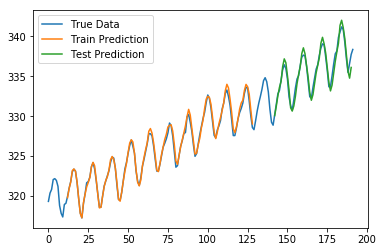

In [19]:
# Plotting results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_nn)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_lag:len(trainPredict)+time_lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_nn)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_lag*2)+1:len(data_nn)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_nn), label='True Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()
